## Brain_Tumor_Prediction Using Mobilenet

#### Overview

- A brain tumor is a mass or growth of abnormal cells in your brain.

- Many different types of brain tumors exist. Some brain tumors are noncancerous (benign), and some brain tumors are cancerous (malignant). Brain tumors can begin in your brain (primary brain tumors), or cancer can begin in other parts of your body and spread to your brain (secondary, or metastatic, brain tumors).

- How quickly a brain tumor grows can vary greatly. The growth rate as well as location of a brain tumor determines how it will affect the function of your nervous system.

- Brain tumor treatment options depend on the type of brain tumor you have, as well as its size and location.

<img src="https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2014/10/30/15/17/mcdc7_brain_cancer-8col.jpg" width="250px">

#### Symptoms

General signs and symptoms caused by brain tumors may include:

        1. New onset or change in pattern of headaches
        2. Headaches that gradually become more frequent and more severe
        3. Unexplained nausea or vomiting
        4. Vision problems, such as blurred vision, double vision or loss of peripheral vision
        5. Gradual loss of sensation or movement in an arm or a leg
        6. Difficulty with balance
        7. Speech difficulties
        8. Confusion in everyday matters
        9. Personality or behavior changes
        10. Seizures, especially in someone who doesn't have a history of seizures
        11. Hearing problems

In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL
from PIL import Image

In [2]:
#data sugmentation
# Preprocessing the Training set
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.22)
training_set = datagen.flow_from_directory('train',
                                            target_size=(224,224),
                                            color_mode="rgb",
                                            subset="training",
                                            class_mode="binary",
                                            batch_size=32,
                                            shuffle=True)

Found 198 images belonging to 2 classes.


In [3]:
valid_generator=datagen.flow_from_directory( directory="train",
                                                target_size=(224,224),
                                                color_mode="rgb",
                                                subset="validation",
                                                class_mode="binary",
                                                batch_size=32,
                                                shuffle=True)

Found 55 images belonging to 2 classes.


In [4]:
## showing some image from training
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

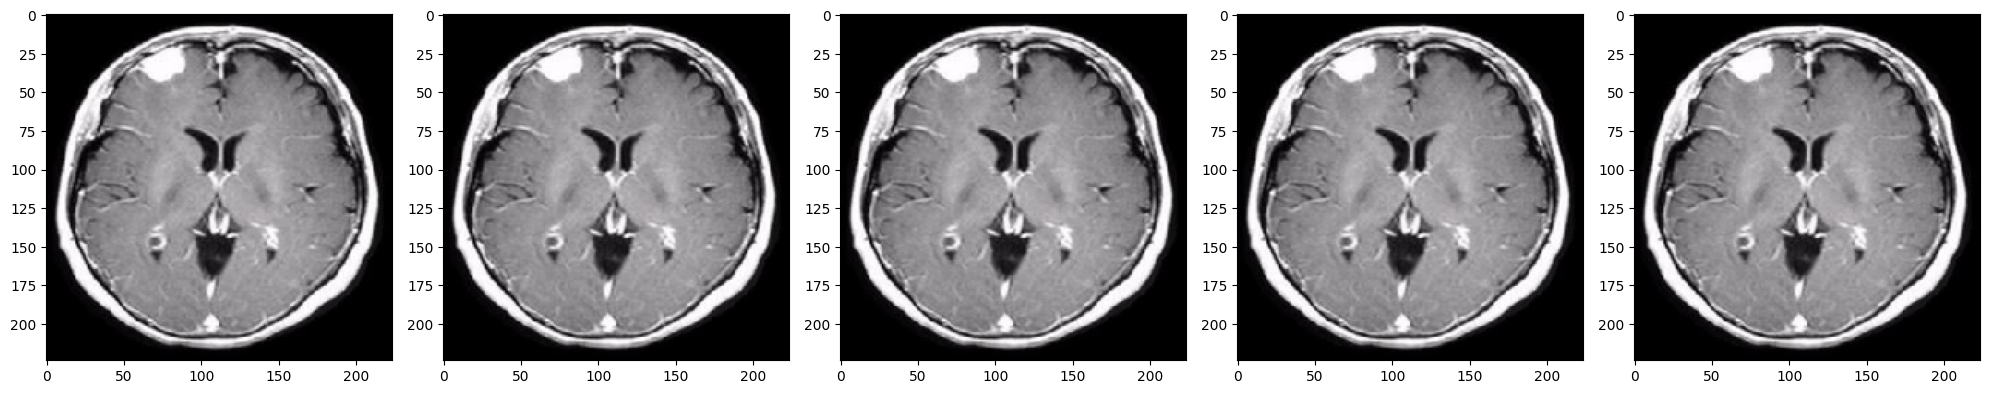

In [5]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [6]:
training_set.class_indices

{'no': 0, 'yes': 1}

In [7]:
import tensorflow_hub as hub 

In [8]:
BATCH_SIZE = 5
IMG_SHAPE = 224 # match image dimension to mobile net input keep smae

In [17]:
# getting MobileNet
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(URL, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

In [18]:
mobile_net.trainable = False

In [20]:
# model = tf.keras.models.Sequential([
#     mobile_net,
#     ### ann layer
#     tf.keras.layers.Dense(1, activation='sigmoid') #[0, 1] or [1, 0]
#     ])

model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: mobile_net(x), input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
history = model.fit(
    training_set,
    epochs=10,
    validation_data=valid_generator
    )

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 415ms/step - accuracy: 0.5113 - loss: 0.7737 - val_accuracy: 0.6182 - val_loss: 0.6115
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 362ms/step - accuracy: 0.6296 - loss: 0.6573 - val_accuracy: 0.7455 - val_loss: 0.5282
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 358ms/step - accuracy: 0.7847 - loss: 0.5270 - val_accuracy: 0.7455 - val_loss: 0.4821
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 361ms/step - accuracy: 0.8184 - loss: 0.4876 - val_accuracy: 0.8364 - val_loss: 0.4457
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 359ms/step - accuracy: 0.8267 - loss: 0.4546 - val_accuracy: 0.8364 - val_loss: 0.4158
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 358ms/step - accuracy: 0.8515 - loss: 0.4209 - val_accuracy: 0.8182 - val_loss: 0.3952
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 366ms/step - accuracy: 0.8951 - loss: 0.3742 - val_accuracy: 0.8364 - val_loss: 0.3733
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 463ms/step - accuracy: 0.8990 - loss: 0.3557 - val_accuracy: 0.8182 - val_loss: 0.3665
Epo

In [26]:
# Part 4 - Making a single prediction test
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/Users/sushritasharma/Desktop/Brain-Tumor-Detection-CNN-Architecture-master 2/uploads/9.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


array([[0.76752234]], dtype=float32)

In [27]:
if result[0]<=0.5:
    print("No BrainTumor")
else:
    print("BrainTumor")

BrainTumor


In [28]:
#save model
from tensorflow.keras.models import load_model
model.save('brain_tumor.h5')